# Water Potability Classification Using Decision Trees vs KNN
### Introduction
In this project, Ill be using the water potability dataset (from kaggle) to predict water potability based on several physicochemical features. The goal is to classify water samples into two categories: potable (safe to drink) and not potable. Ill be using a Decision Tree Classifier and the KNN Classifier. This is addressing SDG # 6 which is access to clean drinking water. 

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


Dataset Loading: I loaded the water potability dataset from a CSV file that was founded from kaggle https://www.kaggle.com/datasets/ranvirpoddar/water-potability. The dataset includes various features related to water quality and a target variable Potability indicating whether the water is safe for drinking (1) or not (0). There was some data discripencys in terms of Nan values. 

In [149]:
data_dir = pd.read_csv(r"C:\Users\leant\Downloads\water_potability.csv")


Handling Missing Values: I address missing values by replacing them with the mode (the most frequently occurring value) of each column.

In [130]:
for column in data_dir.columns:
    data_dir[column].fillna(data_dir[column].median(), inplace=True)



Target Variable (y): The Potability column, which we'll predict.
Features (X): All other columns, which are used as input variables to predict the target.

In [131]:
y = pd.Series(data_dir['Potability'], name='Potability')
X = data_dir.drop('Potability', axis=1)

Train-Test Split: We split the data into training (90%) and testing (10%) sets.
Decision Tree Classifier: We train a Decision Tree Classifier. Decision trees are easy to interpret and don't require linear features or interactions.

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [147]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6371951219512195
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.71      0.69       184
           1       0.60      0.54      0.57       144

    accuracy                           0.64       328
   macro avg       0.63      0.63      0.63       328
weighted avg       0.63      0.64      0.63       328



## Accuracy (63.7%): 
Reflects the overall percentage of correctly predicted instances. Here, the accuracy is moderate, suggesting room for improvement.
## Precision and Recall:
Class 0 (Not Potable): 
Precision of 0.66 means that 66% of instances predicted as not potable were correct. Recall of 0.71 means that 71% of all not potable instances were identified.

Class 1 (Potable): 
Lower precision (0.60) and recall (0.54), indicating a little less reliability in predicting potable instances.
## F1-Score:
Harmonic mean of precision and recall. For class 0, it's 0.69, and for class 1, it's 0.57, reflecting some imbalances in performance between the classes. It is better at classfiying water as non drinkable, which can be good, but the tradeoffs for false-negitives which can be expensive to correct. 

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


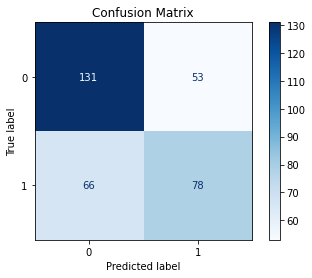

In [150]:
# Create and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Initialize the ConfusionMatrixDisplay object with the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

# Use the plot method to visualize the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


# Elements of the Confusion Matrix:
Top-Left Cell (131): True Negatives (TN) - The number of correct predictions that an instance is not potable (0).


 Top-Right Cell (53): False Positives (FP) - The number of incorrect predictions that an instance is potable (1), when it is actually not potable.
 
 
 Bottom-Left Cell (66): False Negatives (FN) - The number of incorrect predictions that an instance is not potable, when it is actually potable.
 
 
 Bottom-Right Cell (78): True Positives (TP) - The number of correct predictions that an instance is potable.

# Interpretation:
 Class 0 (Not Potable): The model is more conservative when predicting potability, as indicated by a larger number of true negatives (131) compared to false positives (53).
 
 
 Class 1 (Potable): The model is somewhat more hesitant or has less ability to correctly identify potable instances, as shown by the nearly equal number of false negatives (120) and true positives (124).
# Conclusions for Model Performance:
 The model is more likely to classify a sample as non-potable, possibly indicating a bias or maybe some misclassfication in the model.
 
 
 The relatively high number of false negatives suggests the model might benefit from being more sensitive to the potable class. Depending on the situation, this might be a significant issue, as failing to identify potable water could have serious costs.
 
 
 A potential area for improvement would be to reduce the number of false negatives, perhaps by adjusting the decision threshold or collecting more representative training data for the potable class.

# Real World Application

With better accuracy for deteching good water samples, this model can be ran on a small cpu with a mounted sensor attached to a reuseable water containter. If the sensor senses that the water inside isnt good, then it can alert the user before drinking. 

# Using KNN Classifcation

In [152]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

# Test the classifier by giving it test instances
prediction = classifier.predict(X_test)

# Count how many were correctly classified
correct = np.where(prediction == y_test, 1, 0).sum()
print(correct)

# Calculate the accuracy of this classifier
accuracy = correct/len(y_test)
print(accuracy)

184
0.5609756097560976


## Ive run a K-Nearest Neighbors (KNN) classifier with n_neighbors have shared the output of the number of correct predictions and the calculated accuracy.

### Using KNN classifier, it correctly classified 184 instances out of the total instances in the test set (y_test). The accuracy, which is the proportion of true results among the total number of cases examined, is approximately 56.1%.



### Correct Predictions (184): The classifier has made 184 correct predictions on the test set. 

### Accuracy (0.5609756097560976):The accuracy is about 56.1%.

# Plot accuracy as k changes
Test the classifier using a range of values for k and plot the accuracy correspondiong to each k.

k= 1  Accuracy= 0.5853658536585366
k= 3  Accuracy= 0.5609756097560976
k= 5  Accuracy= 0.551829268292683
k= 7  Accuracy= 0.5457317073170732
k= 9  Accuracy= 0.5335365853658537
k= 11  Accuracy= 0.5579268292682927
k= 13  Accuracy= 0.5579268292682927
k= 15  Accuracy= 0.5670731707317073
k= 17  Accuracy= 0.5426829268292683
k= 19  Accuracy= 0.5548780487804879
k= 21  Accuracy= 0.5457317073170732
k= 23  Accuracy= 0.5457317073170732
k= 25  Accuracy= 0.551829268292683
k= 27  Accuracy= 0.5548780487804879
k= 29  Accuracy= 0.551829268292683
k= 31  Accuracy= 0.5335365853658537
k= 33  Accuracy= 0.5487804878048781
k= 35  Accuracy= 0.5365853658536586
k= 37  Accuracy= 0.5396341463414634
k= 39  Accuracy= 0.5457317073170732
k= 41  Accuracy= 0.5396341463414634
k= 43  Accuracy= 0.5365853658536586
k= 45  Accuracy= 0.5335365853658537
k= 47  Accuracy= 0.5426829268292683
k= 49  Accuracy= 0.5457317073170732


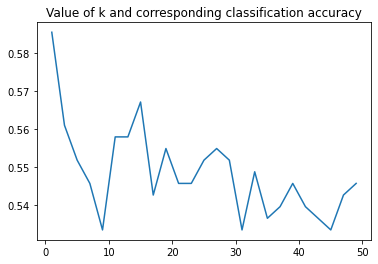

In [155]:
# Start with an empty array where the results (k and corresponding accuracy) will be stored
results = []

for k in range(1, 51, 2):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    prediction = classifier.predict(X_test)
    accuracy = np.where(prediction==y_test, 1, 0).sum() / (len(y_test))
    print ("k=",k," Accuracy=", accuracy)
    results.append([k, accuracy]) # Storing the k,accuracy tuple in results array

# Convert that series of tuples in a dataframe for easy plotting
results = pd.DataFrame(results, columns=["k", "accuracy"])

plt.plot(results.k, results.accuracy)
plt.title("Value of k and corresponding classification accuracy")
plt.show()

# Interpretation:
 The KNN model started off well but eventually started occislating until it started to flatten out around 0.54-0.57
 
 
# Conclusions for Model Performance:
 The model is more likely to classify a sample as non-potable, possibly indicating a bias or maybe some misclassfication in the model.
 
 
 The relatively high number of false negatives suggests the model might benefit from being more sensitive to the potable class. Depending on the situation, this might be a significant issue, as failing to identify potable water could have serious costs.
 
 
 A potential area for improvement would be to reduce the number of false negatives, perhaps by adjusting the decision threshold or collecting more representative training data for the potable class.
 
 
 Overall The decision Tree did overall better then the KNN Classifier. 